### Titanic Survival Prediction

You are a data scientist / AI engineer working on a binary classification problem to predict the survival of passengers from the Titanic crash. You have been provided with a dataset named **`"titanic.csv"`** which includes various features of passengers to predict whether they survived or not. The dataset comprises the following columns:

- `passenger_id:` The unique identifier for each passenger.
- `name:` The name of the passenger.
- `p_class:` The passenger class (1 = 1st class, 2 = 2nd class, 3 = 3rd class).
- `sex:` The gender of the passenger.
- `age:` The age of the passenger.
- `sib_sp:` The number of siblings or spouses the passenger had aboard the Titanic.
- `parch:` The number of parents or children the passenger had aboard the Titanic.
- `ticket:` The ticket number of the passenger.
- `fare:` The fare the passenger paid for the ticket.
- `cabin:` The cabin number where the passenger stayed.
- `embarked:` The port where the passenger boarded the Titanic (C = Cherbourg; Q = Queenstown; S = Southampton).
- `survived:` Whether the passenger survived (1) or not (0).

Your task is to use this dataset to build and evaluate a `Gaussian Naive Bayes` model to predict whether a passenger survived based on their features. You will also evaluate the model's performance using precision, recall, and other classification metrics.

**Import Necessary Libraries**

In [150]:
# Import Necessary Libraries
import warnings
warnings.filterwarnings("ignore")
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn.preprocessing import StandardScaler
from sklearn.metrics import classification_report, confusion_matrix
from sklearn.model_selection import train_test_split
from sklearn.naive_bayes import GaussianNB

### Task 1: Data Preparation and Exploration

1. Import the data from the `"titanic.csv"` file and store it in a variable df.
2. Display the number of rows and columns in the dataset.
3. Display the first few rows of the dataset to get an overview.
4. Check for any missing values in the dataset.
5. Drop columns that do not add much value `(passenger_id, name, sib_sp, parch, ticket, cabin, embarked)`.
6. Visualize the distribution of the target variable `survived` and `p_class` using a bar chart.
7. Visualize the distribution of `sex` using a pie chart (percentage).
8. Visualize the distribution of `age` and `fare` using histograms.

In [151]:
# Step 1: Import the data from the "titanic.csv" file and store it in a variable df
df = pd.read_csv("titanic.csv")

# Step 2: Display the number of rows and columns in the dataset
print(df.shape)

# Step 3: Display the first few rows of the dataset to get an overview
df.head()

(891, 12)


,passenger_id,name,p_class,sex,age,sib_sp,parch,ticket,fare,cabin,embarked,survived
0,1,"Braund, Mr. Owen Harris",3,male,22.0,1,0,A/5 21171,7.2500,NaN,S,0
1,2,"Cumings, Mrs. John Bradley (Florence Briggs Th...",1,female,38.0,1,0,PC 17599,71.2833,C85,C,1
2,3,"Heikkinen, Miss. Laina",3,female,26.0,0,0,STON/O2. 3101282,NaN,NaN,S,1
3,4,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",1,female,35.0,1,0,113803,53.1000,C123,S,1
4,5,"Allen, Mr. William Henry",3,male,35.0,0,0,373450,8.0500,NaN,S,0


In [152]:
# Step 4: Check for any missing values in the dataset 
df.isnull().sum()

passenger_id      0
name              0
p_class           0
sex               0
age             177
sib_sp            0
parch             0
ticket            0
fare              9
cabin           687
embarked          2
survived          0
dtype: int64

### Observation
* Columns age, fare, cabin and embarked have null values.
* Columns age and cabin have significant number of null values.

In [153]:
# Step 5: Drop columns that do not add much value (passenger_id, name, sib_sp, parch, ticket, cabin, embarked)
df.drop(columns=["passenger_id", "name", "sib_sp", "parch", "ticket", "cabin", "embarked"], inplace=True)
df.head()
df.survived.unique()

array([0, 1])

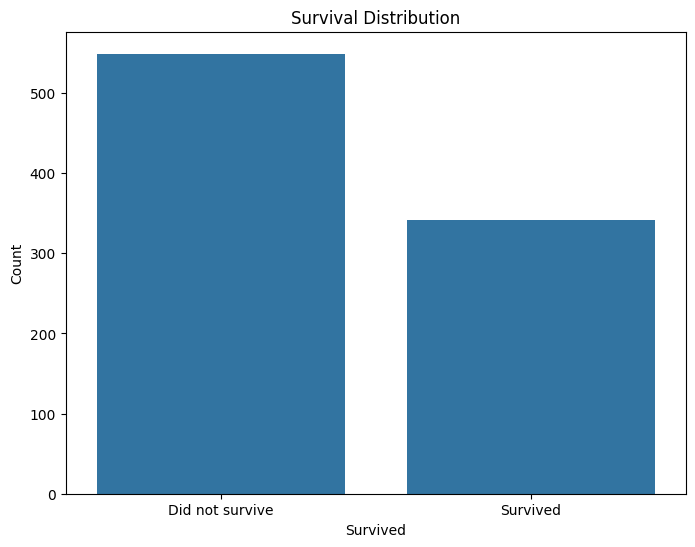

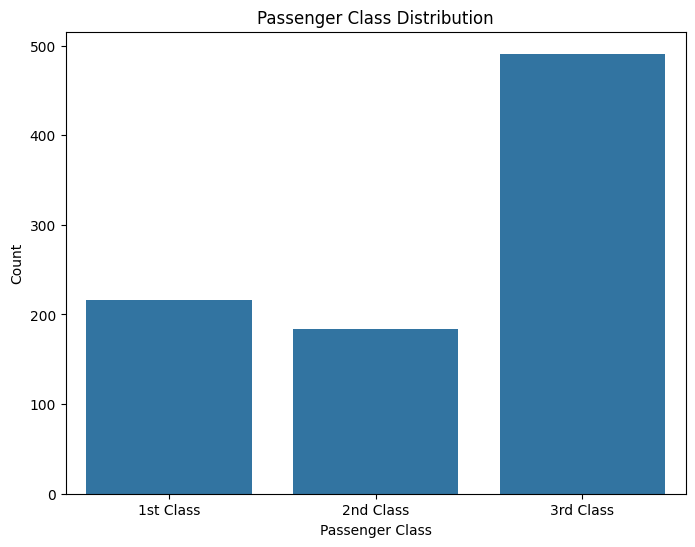

In [154]:
# Step 6: Visualize the distribution

#'survived'
plt.figure(figsize=(8, 6))
sns.countplot(x='survived', data=df)
plt.title('Survival Distribution')
plt.xlabel('Survived')
plt.ylabel('Count')
plt.xticks([0, 1], ['Did not survive', 'Survived'])
plt.show()

# 'p_class'
plt.figure(figsize=(8, 6))
sns.countplot(x='p_class', data=df)
plt.title('Passenger Class Distribution')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.show()

### Observations
* From "Survival Distribution", we came to know that no. of people survived is less than number of died.
* From "Passenger Class Distribution", there are more no. of passenger is Class 3, followed by Class 1 and Class 2.

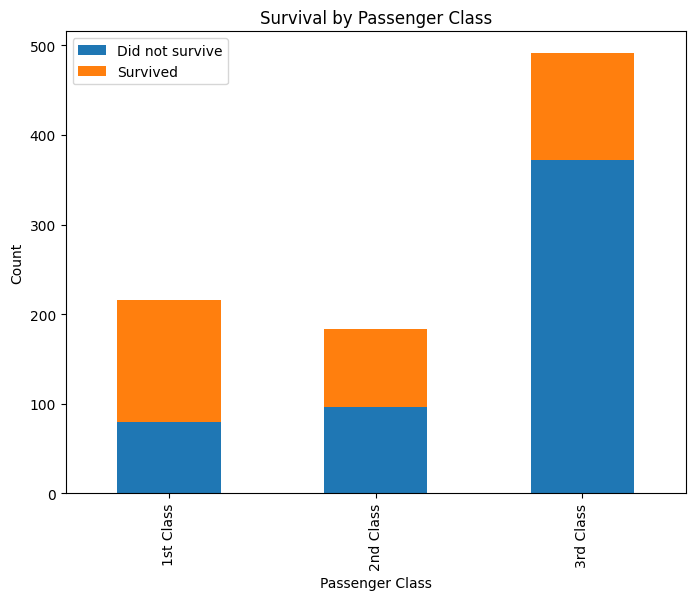

In [155]:
survival_by_class = df.groupby(['p_class', 'survived']).size().unstack()
survival_by_class.plot(kind='bar', stacked=True, figsize=(8, 6))
plt.title('Survival by Passenger Class')
plt.xlabel('Passenger Class')
plt.ylabel('Count')
plt.xticks([0, 1, 2], ['1st Class', '2nd Class', '3rd Class'])
plt.legend(['Did not survive', 'Survived'], loc='upper left')
plt.show()

### Observations
* From "Survival by Passenger Class", we came to know that large percentage of people from 1st class survived followed by 2nd Class passengers and 3rd Class passengers.

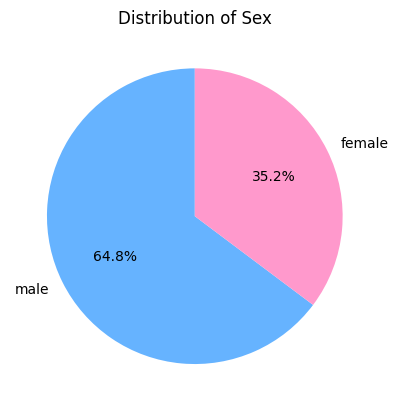

In [156]:
# Step 7: Visualize the distribution of 'sex' using a pie chart (percentage)
plt.pie(df.sex.value_counts(), labels=df.sex.value_counts().index, autopct='%1.1f%%', startangle=90, colors=['#66b3ff', '#ff99cc'])
plt.title('Distribution of Sex')
plt.show()

### Observations
* From "Distribution of Sex", we came to know that there were more no. of male passengers than the female in the ship.

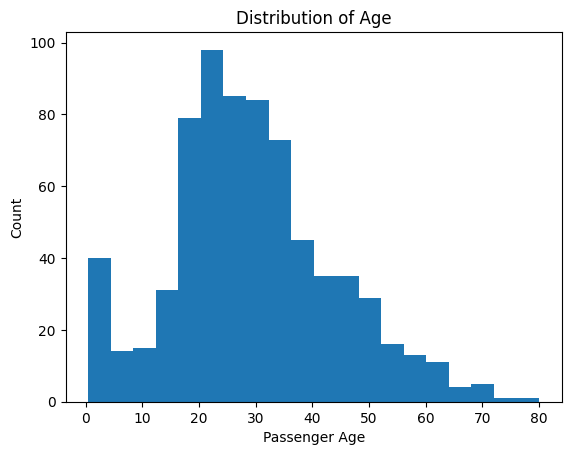

In [157]:
# Step 8: Visualize the distribution of 'age' using a histogram
plt.hist(df.age, bins=20)
plt.title('Distribution of Age')
plt.xlabel('Passenger Age')
plt.ylabel('Count')
plt.show() 

### Observations
* From "Distribution of Age", we came to know that most of the passengers were of age between 15 to 50 years old.

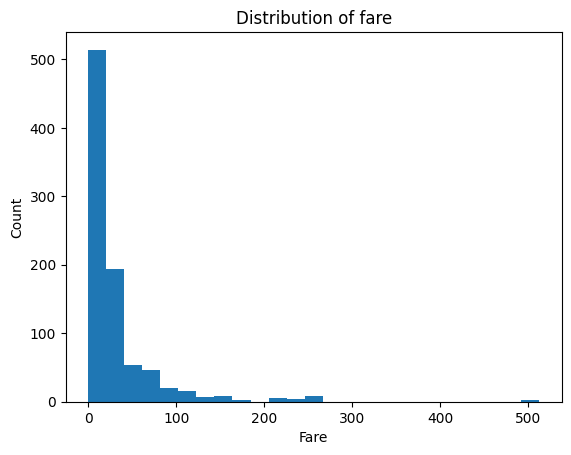

In [158]:
# Step 9: Visualize the distribution of 'fare' using a histogram
plt.hist(df.fare, bins=25)
plt.title('Distribution of fare')
plt.xlabel('Fare')
plt.ylabel('Count')
plt.show() 

### Observations
* Maximum number of passenger paid fare below 30

### Task 2: Data Preprocessing

1. Fill in missing values in the `age and fare` columns with their median values.
2. Encode the sex column using one-hot encoding.
3. Standardize the fare column using StandardScaler.
4. Select the features `(p_class, sex, age, fare)` and the target variable `(survived)` for modeling.
5. Split the dataset into training and testing sets with a test size of 30%.

In [159]:
# Step 1: Fill in missing values in the 'age' and 'fare' columns with their median values
df.age.fillna(df.age.median(), inplace = True)
df.fare.fillna(df.fare.median(), inplace = True)
df.isnull().sum()

p_class     0
sex         0
age         0
fare        0
survived    0
dtype: int64

In [160]:
# Step 2: Encode the 'sex' column using one-hot encoding
df = pd.get_dummies(df, columns=['sex'], drop_first=True)
df.head()

,p_class,age,fare,survived,sex_male
0,3,22.0,7.2500,0,True
1,1,38.0,71.2833,1,False
2,3,26.0,14.4542,1,False
3,1,35.0,53.1000,1,False
4,3,35.0,8.0500,0,True


In [161]:
# Step 3: Standardize the 'fare' column using StandardScaler
scaler = StandardScaler()
df['fare'] = scaler.fit_transform(df[['fare']])
df.head()

,p_class,age,fare,survived,sex_male
0,3,22.0,-0.500819,0,True
1,1,38.0,0.788518,1,False
2,3,26.0,-0.355760,1,False
3,1,35.0,0.422390,1,False
4,3,35.0,-0.484711,0,True


In [162]:
# Step 4: Select the features and target variable for modeling
features = ['p_class', 'age', 'fare', 'sex_male']
X = df[features]
y = df['survived']

# Step 5: Split the dataset into training and testing sets with a test size of 30%
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

### Task 3: Model Training Using Gaussian Naive Bayes

1. Initialize and train a `Gaussian Naive Bayes` model using the training data.
2. Make predictions on the test set using the trained model.
3. Evaluate the model using a classification report and print the report.
4. Visualize the confusion matrix for the model.

In [163]:
# Step 1: Initialize and train a Gaussian Naive Bayes model using the training data
gnb = GaussianNB()
gnb.fit(X_train, y_train)

# Step 2: Make predictions on the test set using the trained model
y_pred = gnb.predict(X_test)

In [164]:
# Step 3: Evaluate the model using a classification report and print the report
print(classification_report(y_test, y_pred))

              precision    recall  f1-score   support

           0       0.81      0.80      0.81       157
           1       0.73      0.74      0.73       111

    accuracy                           0.78       268
   macro avg       0.77      0.77      0.77       268
weighted avg       0.78      0.78      0.78       268



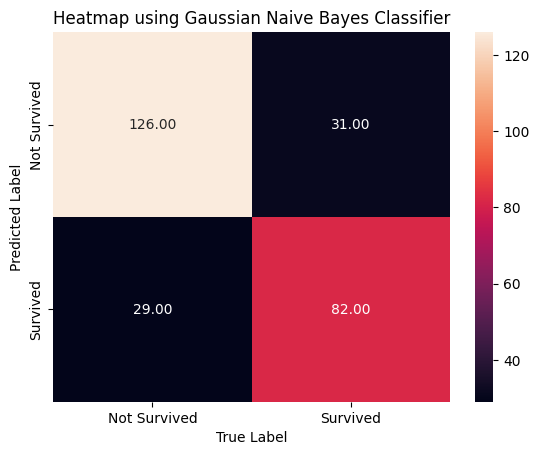

In [168]:
# Step 4: Visualize the confusion matrix for the model
cmf = confusion_matrix(y_test, y_pred)
sns.heatmap(cmf, fmt=".2f", annot=True, xticklabels=['Not Survived', 'Survived'], yticklabels=['Not Survived', 'Survived'])
plt.title("Heatmap using Gaussian Naive Bayes Classifier")
plt.xlabel("True Label")
plt.ylabel("Predicted Label")
plt.show()

### Observations
* <strong>Accuracy</strong> for Titanic dataset using <strong>Gaussian Naive Bayes Classifier</strong> with <i>one-hot encoding</i> and <i>standard scalar</i> feature pre-processing is <strong>78% </strong>